In [1]:
from gum import *

In [2]:
from math import sqrt, sin, cos

In [3]:
%config InlineBackend.figure_format = 'svg'

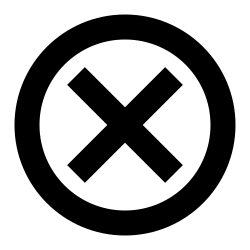

In [4]:
ex0 = Ray(-45, stroke_width=25) + Ray(45, stroke_width=25)
ex = Frame(ex0, margin=0.25)
ci = Circle(stroke_width=25)
bt = ex + ci
Frame(bt, margin=0.1)

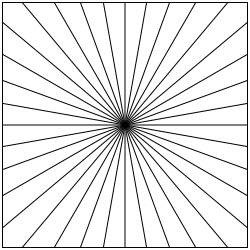

In [5]:
Box([Ray(th) for th in range(-90, 90, 10)]) + Rect()

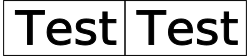

In [6]:
t = Node('Test')
t | t

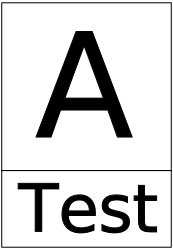

In [7]:
t1 = Node(text='A')
t2 = Node(text='Test')
t1 & t2

### Text Debug

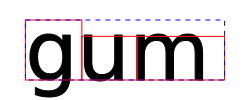

In [8]:
text = TextDebug(text='gum')
logo = Frame(text, padding=(0.1, 0.2))
s = SVG(logo, size=(250, 100))
s.save('gum.svg')
s

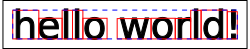

In [9]:
hello = TextDebug(text='hello world!')
s = Frame(hello, padding=(0.04, 0.2), border=1)
s.save('test/hello.svg')
s

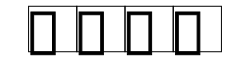

In [10]:
squares = list('🦊🍄🗻⬜')
squares = [Emoji(text=s) for s in squares]
squares = [Frame(s, border=1) for s in squares]
s = Frame(HStack(squares), margin=0.1)
s.save('test/emoji.svg')
s

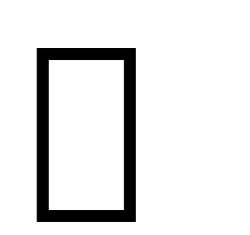

In [11]:
Frame(Emoji('🍄'), margin=0.1)

### Font Shaping

In [12]:
from gi.repository import HarfBuzz as hb
from gi.repository import GLib
from gum import fonts

In [13]:
font, infos, positions, extents = get_text_shape('🗻', font='Noto Emoji', debug=True)
ext, pos = extents[0].extents, positions[0]
print(ext.width, -ext.height)
print(ext.x_bearing, ext.y_bearing)
print(pos.x_offset, pos.y_offset)
print(pos.x_advance, pos.y_advance)

2555 2405
0 1898
0 0
2550 0


In [14]:
get_text_shape('Hello', font='Montserrat', weight='Light')

([(82, 0), (442, 1), (508, 2), (508, 3), (530, 4)],
 [(0.57, 0.7), (0.499, 0.53), (0.05, 0.742), (0.05, 0.742), (0.522, 0.53)],
 [(0.814, 0.0), (0.597, 0.0), (0.261, 0.0), (0.261, 0.0), (0.62, 0.0)],
 [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)])

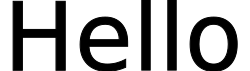

In [15]:
Text('Hello', font_family='Montserrat', font_weight='Light')

### Layout

In [16]:
na = Node(text='A', pad=0.2)
nt = Node(text='Test', pad=0.2)
b = Bullet()

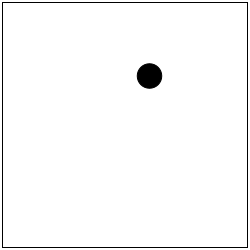

In [17]:
Point(b, x=0.6, y=0.3, r=0.05) + Rect()

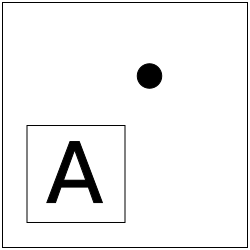

In [18]:
Scatter({
    b: (0.6, 0.3, 0.05),
    na: (0.3, 0.7, 0.2)
}) + Rect()

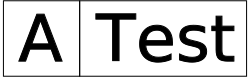

In [19]:
na | nt

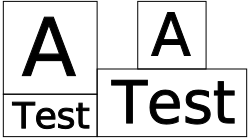

In [20]:
(na & nt) | (na * nt)

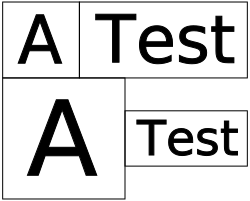

In [21]:
(na | nt) & (na ^ nt)

### Plots

In [22]:
ticks = {0.15: 'hello', 0.35: '0.3', 0.5: 'abc', 0.8: 'world'}

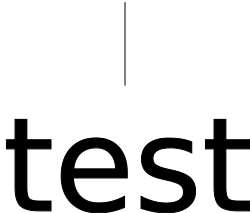

In [23]:
VTick('test')

In [24]:
HScale(ticks)

In [25]:
HAxis(ticks)

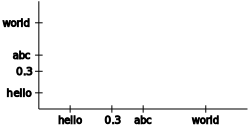

In [26]:
Axes(xticks=ticks, yticks=ticks, aspect=2)

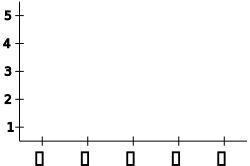

In [27]:
Axes(
    xticks={0.1: Emoji('🍄'), 0.3: Emoji('🍩'), 0.5: Emoji('🚀'), 0.7: Emoji('🦊'), 0.9: Emoji('🐋')},
    yticks={0.1: '1', 0.3: '2', 0.5: '3', 0.7: '4', 0.9: '5'},
    aspect=1.5, xaxis_tick_text_scale=1.5
)

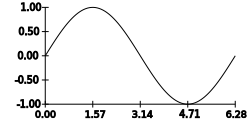

In [28]:
path = SymPath(np.sin, xlim=(0, 2*np.pi))
plot = Plot(path, aspect=2)
Frame(plot, padding=0.05)

In [29]:
def plot_scandal(xlim=(0, 2*np.pi), ylim=(-2.3, 1.3), yticks=[-2, -1, 0, 1], xticks=None):
    line1 = SymPath(np.sin, xlim=xlim, stroke='#1e88e5')
    line2 = SymPath(lambda x: -0.05*x**2, xlim=xlim, stroke='#ff0d57')
    line3 = SymPath(lambda x: 0, xlim=xlim, stroke_dasharray=4)

    if xticks is None:
        xticks = {x: Emoji(e) for x, e in zip(np.linspace(0.5, 5.8, 5), '🍄🍩🚀🦊🐋')}

    plot = Plot(
        [line1, line2, line3], aspect=1.5, ylim=ylim,
        yticks=yticks, xticks=xticks, xaxis_tick_text_scale=1.5
    )
    
    return plot

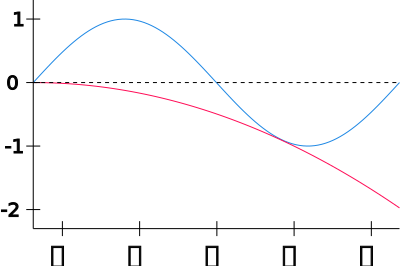

In [32]:
plot = plot_scandal()
SVG(plot, size=400)

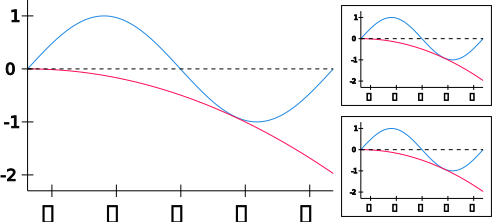

In [33]:
plot1 = Frame(plot, margin=0.05, padding=0.05, border=1)
SVG(plot | (plot1 & plot1), size=500)

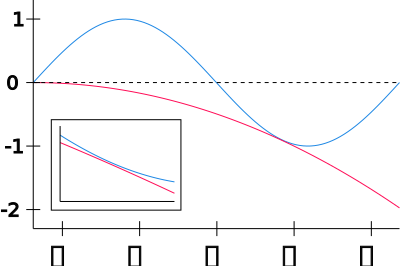

In [34]:
plot1 = Frame(
    plot_scandal(
        xlim=(4.05, 4.55), ylim=(-1.07, -0.75),
        xticks=[], yticks=[]
    ),
    border=1, padding=(0.05, 0.07),
)
cont = Container([
    plot_scandal(),
    Point(plot1, x=0.28, y=0.62, r=0.17),
], aspect=plot.aspect)
SVG(cont, size=400)

### Golfing

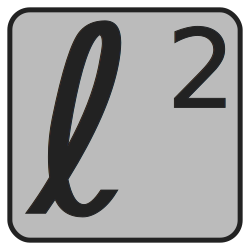

In [35]:
font = 'STIX'
fgcol = '#222'
bgcol = '#BBB'
size = 100

ell = Text('ℓ', font_family=font, fill=fgcol, stroke=fgcol)
two = Text('2', font_family=font, fill=fgcol, stroke=fgcol)
ell2 = HStack([ell, VStack({two: 0.4}, expand=False)])

logo = Frame(
    ell2, padding=0.08, margin=0.03, aspect=1, border=size/20,
    rect_rx=size/5, rect_fill=bgcol, rect_stroke=fgcol
)

logo

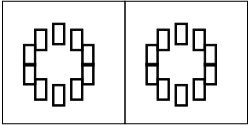

In [36]:
from itertools import cycle
emoji = cycle('🍄🍩🚀🦊🐋')
ts = np.linspace(0, 2*np.pi, 11)[:-1]
xs = 0.25 + 0.5*(np.sin(ts)+1)/2
ys = 0.25 + 0.5*(np.cos(ts)+1)/2
wreath = Scatter({
    Emoji(e): (x, y) for e, x, y in zip(emoji, xs, ys)
}, r=0.1, aspect=1)
frame = Frame(wreath, border=1)
frame | frame

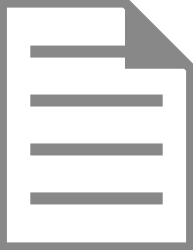

In [37]:
clip = 0.27
rows = 4
aspect = 8.5/11
bwidth = 10
lwidth = 12
scolor = '#888'

paper = Polygon(
    [(0, 0), (1-clip/aspect, 0), (1, clip), (1, 1), (0, 1)],
    stroke=scolor, stroke_width=bwidth
)
cut = Polygon(
    [(1-clip/aspect, 0), (1-clip/aspect, clip), (1, clip)],
    stroke=scolor, stroke_width=0, fill=scolor
)

line = HLine(stroke=scolor, stroke_width=lwidth)
lines = Frame(VStack(rows*[line]), margin=(0.15, 0.1))

sheet = Box([paper, lines, cut], aspect=aspect)
sheet

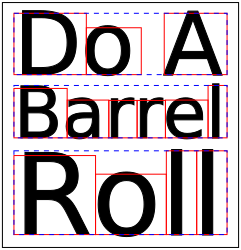

In [38]:
padbox = lambda e: Frame(e, padding=(0.03, 0.08))
Frame(gum.VStack([
    padbox(TextDebug('Do A')),
    padbox(TextDebug('Barrel')),
    padbox(TextDebug('Roll')),
], expand=True), border=1, padding=(0.02, 0.02))